<a href="https://colab.research.google.com/github/laurenzberger/retail-data-challenge/blob/master/RetailRegressionChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Rossmann Challenge Prep

## Dataset 

https://www.kaggle.com/c/rossmann-store-sales/data

## Usefull Inspiration

https://github.com/agostontorok/KaggleRossmannChallenge/blob/master/MeetupPrez.ipynb

https://github.com/deadskull7/Rossmann-Store-Sales-Predictions/blob/master/Rossmann_Store_Sales.ipynb

https://github.com/elena-petrova/rossmann_TSA_forecasts/blob/master/Rossmann_Sales.ipynb

https://github.com/JohanManders/ROSSMANN-KAGGLE/blob/master/ROSSMANN%20STORE%20SALES%20COMPETITION%20KAGGLE.ipynb

## Get Data from Github repo

In [0]:
#download dataset from git repo if not there yet
%%bash
[ ! -d "/content/retail-data-challenge" ] && git clone https://github.com/laurenzberger/retail-data-challenge.git

In [0]:
cd /content/retail-data-challenge


/content/retail-data-challenge


In [0]:
!ls -la

total 52
drwxr-xr-x 4 root root  4096 Apr  8 14:51  .
drwxr-xr-x 1 root root  4096 Apr  8 14:51  ..
drwxr-xr-x 2 root root  4096 Apr  8 14:51  data
drwxr-xr-x 8 root root  4096 Apr  8 14:51  .git
-rw-r--r-- 1 root root  5780 Apr  8 14:51 'MMS Regression Challenge.ipynb'
-rw-r--r-- 1 root root    23 Apr  8 14:51  README.md
-rw-r--r-- 1 root root 22805 Apr  8 14:51  RetailRegressionChallenge.ipynb


In [0]:
!pwd

/content/retail-data-challenge


In [0]:
!git pull

Already up to date.


## Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Ingest the Dataset

In [0]:
ls -la ./data/


total 3888
drwxr-xr-x 2 root root    4096 Apr  8 14:51 ./
drwxr-xr-x 4 root root    4096 Apr  8 14:51 ../
-rw-r--r-- 1 root root  317611 Apr  8 14:51 sample_submission.csv
-rw-r--r-- 1 root root   45010 Apr  8 14:51 store.csv
-rw-r--r-- 1 root root 1099661 Apr  8 14:51 test_v2.csv
-rw-r--r-- 1 root root 2504622 Apr  8 14:51 train_v2.csv


In [0]:
train = pd.read_csv("./data/train_v2.csv", parse_dates=['Date'], low_memory=False)
test  = pd.read_csv("./data/test_v2.csv",  parse_dates=['Date'], low_memory=False)
store = pd.read_csv("./data/store.csv")

## Explore the dataset

### Print a few lines of each dataset

In [0]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [0]:
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-01-30,5577,616,1,1,0,0
1,2,5,2015-01-30,5919,624,1,1,0,0
2,3,5,2015-01-30,6911,678,1,1,0,0
3,4,5,2015-01-30,13307,1632,1,1,0,0
4,5,5,2015-01-30,5640,617,1,1,0,0


In [0]:
test.head(5)

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,555,1,1,0,1
1,2,5,2015-07-31,625,1,1,0,1
2,3,5,2015-07-31,821,1,1,0,1
3,4,5,2015-07-31,1498,1,1,0,1
4,5,5,2015-07-31,559,1,1,0,1


What size of data are we dealing with? 

In [0]:
print("Training samples: {0}".format(len(train)))
print("Test samples: {0}".format(len(test)))
print("Stores: {0}".format(len(store)))

Training samples: 66900
Test samples: 33450
Stores: 1115


### What dates does the test and train data cover?

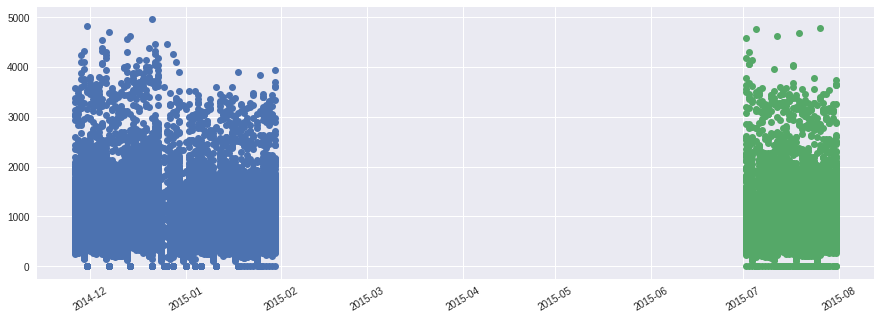

In [0]:
#plot the dates of train and test data to see if we are extrapolating or interpolating
#https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html
fig, ax = plt.subplots(figsize=(15,5))
plt.plot_date(train['Date'],train['Customers'])
plt.plot_date(test['Date'],test['Customers'])
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.show()

The training data covers a bit more than 2 month from end of 2014 until February 2015. The test data is for July 2015. 
This means that there might be seasonal effects that the model can not cover. 

